# **Hill and Valley Prediction with Logistic Regression**

## **Title of Project**

Hill and Valley Prediction Using Logistic Regression

## **Objective**

The objective of this project is to develop a logistic regression model to predict whether a given set of features represents a hill or a valley.

## **Data Source**

The dataset is sourced from the YBI Foundation's GitHub repository: Hill Valley Dataset.

## **Import Library**

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


## **Import Data**

In [46]:
# Load data
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Hill%20Valley%20Dataset.csv')

## **Describe Data**

In [47]:
# Display the first few rows of the dataset
print(data.head())

# Get a concise summary of the DataFrame
print(data.info())

# Get descriptive statistics
print(data.describe())

# Check the distribution of the target variable
print(data['Class'].value_counts())

         V1        V2        V3        V4        V5        V6        V7  \
0     39.02     36.49     38.20     38.85     39.38     39.74     37.02   
1      1.83      1.71      1.77      1.77      1.68      1.78      1.80   
2  68177.69  66138.42  72981.88  74304.33  67549.66  69367.34  69169.41   
3  44889.06  39191.86  40728.46  38576.36  45876.06  47034.00  46611.43   
4      5.70      5.40      5.28      5.38      5.27      5.61      6.00   

         V8        V9       V10  ...       V92       V93       V94       V95  \
0     39.53     38.81     38.79  ...     36.62     36.92     38.80     38.52   
1      1.70      1.75      1.78  ...      1.80      1.79      1.77      1.74   
2  73268.61  74465.84  72503.37  ...  73438.88  71053.35  71112.62  74916.48   
3  37668.32  40980.89  38466.15  ...  42625.67  40684.20  46960.73  44546.80   
4      5.38      5.34      5.87  ...      5.17      5.67      5.60      5.94   

        V96       V97       V98       V99      V100  Class  
0     3

## **Data Visualization**

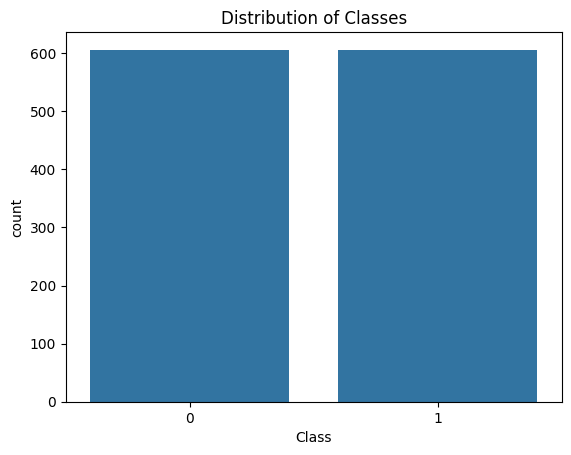

In [81]:
# Plot the distribution of the target variable
sns.countplot(x='Class', data=data)
plt.title('Distribution of Classes')
plt.show()

## **Data Preprocessing**

In [82]:
# Separate target variable 'Class' from feature variables
y = data['Class']
X = data.drop(['Class'], axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## **Define Target Variable (y) and Feature Variables (X)**

In [83]:
# Target variable
y = data['Class']

# Feature variables
X = data.drop(['Class'], axis=1)

## **Train Test Split**

In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

# Check the shape of the train and test samples
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(848, 100) (364, 100) (848,) (364,)


## **Modeling**

In [85]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## **Model Evaluation**

In [86]:
# Predict on the test set
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[172  16]
 [ 44 132]]
Accuracy: 0.8351648351648352
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       188
           1       0.89      0.75      0.81       176

    accuracy                           0.84       364
   macro avg       0.84      0.83      0.83       364
weighted avg       0.84      0.84      0.83       364



## **Prediction**

In [88]:
# Example prediction on new data (use X_test as an example)
new_predictions = model.predict(X_test)
print("New Predictions:", new_predictions)

New Predictions: [0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1
 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0
 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1
 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0]


## **Explanation**

This project demonstrates the process of building a logistic regression model to classify data points as either hill or valley. The dataset is preprocessed by scaling the feature variables. The logistic regression model is then trained on the training set and evaluated on the test set. The model's performance is measured using metrics such as accuracy, confusion matrix, and classification report. This workflow provides a solid foundation for binary classification tasks in machine learning.